In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from IPython.display import display


In [41]:
dataframe= pd.read_csv('/workspaces/Projects/pl-tables-1993-2024.csv')
# display(dataframe)

city_utd_data=dataframe[(dataframe['team']=='Manchester Utd') | (dataframe['team']=='Manchester City') ]
display(city_utd_data)

,season_end_year,team,position,played,won,drawn,lost,gf,ga,gd,points,notes
0,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
8,1993,Manchester City,9,42,15,12,15,56,51,5,57,NaN
22,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
37,1994,Manchester City,16,42,9,18,15,38,49,-11,45,NaN
45,1995,Manchester Utd,2,42,26,10,6,77,29,48,88,→ UEFA Cup via league finish
60,1995,Manchester City,17,42,12,13,17,53,64,-11,49,NaN
66,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
83,1996,Manchester City,18,38,9,11,18,33,58,-25,38,Relegated
86,1997,Manchester Utd,1,38,21,12,5,76,44,32,75,→ Champions League via league finish
107,1998,Manchester Utd,2,38,23,8,7,73,26,47,77,→ Champions League via league finish


In [33]:
x_train= city_utd_data.points.values.reshape(-1,1)
y_train=city_utd_data.position


In [34]:
print(x_train.shape,y_train.shape)

(59, 1) (59,)


In [35]:
soccernicus=LinearRegression()
soccernicus.fit(x_train,y_train)

LinearRegression()

Calculating R^2 Score


In [36]:
r_score=soccernicus.score(x_train,y_train)
print(r_score)



0.8576987110688029


In [37]:
intercept=soccernicus.intercept_
slope=soccernicus.coef_
y_predicted=(slope*x_train)+intercept

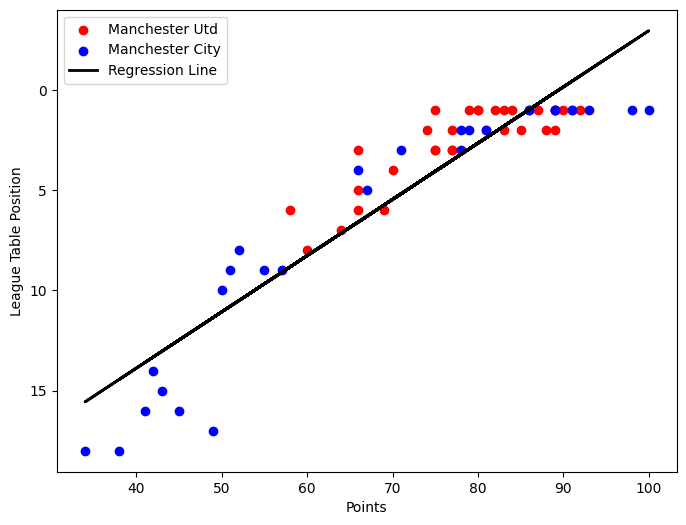

In [38]:
figure, axis = plt.subplots(figsize=(8, 6))
axis.set_xlabel('Points')  # Change to your actual x-axis label
axis.set_ylabel('League Table Position')

plt.scatter(city_utd_data[city_utd_data['team'] == 'Manchester Utd']['points'], city_utd_data[city_utd_data['team'] == 'Manchester Utd']['position'], color='red', label='Manchester Utd')
plt.scatter(city_utd_data[city_utd_data['team'] == 'Manchester City']['points'], city_utd_data[city_utd_data['team'] == 'Manchester City']['position'], color='blue', label='Manchester City')

# Plot the regression line
plt.plot(city_utd_data['points'], y_predicted, color='black', linewidth=2, label='Regression Line')
plt.gca().invert_yaxis()

axis.legend()
plt.show()


 

In [39]:
import pickle

# Assuming 'model' is your trained model
with open('LinearRegression_City_United_Model.pkl', 'wb') as f:
    pickle.dump(soccernicus, f)